In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential ,load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetB0, DenseNet121, InceptionV3, Xception
from tensorflow.keras.optimizers import Adam

In [2]:
combat = "ImageData/Combat"
destroyed_building = "ImageData/DestroyedBuildings"
fire = "ImageData/Fire"
humanterian = "ImageData/Humanitarian Aid and rehabilitation"
vehicles = "ImageData/Military vehicles and weapons"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale=1./255)

In [5]:
combat1=[os.path.join(combat,f) for f in os. listdir (combat)]
destroyed_building1=[os.path.join(destroyed_building,f) for f in os.listdir(destroyed_building)] 
fire1=[os.path.join(fire,f) for f in os.listdir(fire)]
humanterian1=[os.path.join(humanterian,f) for f in os.listdir(humanterian)]
vehicles1=[os.path.join(vehicles,f) for f in os.listdir(vehicles)]


In [6]:
image_files=combat1+destroyed_building1+fire1+humanterian1+vehicles1

In [7]:
label= [0] * len(combat1) +[1] * len(destroyed_building1) + [2] * len(fire1) + [3] * len(humanterian1) + [4] * len(vehicles1)

In [8]:
df = pd.DataFrame({'image': image_files, 'labels': label})
df

,image,labels
0,/Users/ishanurgaonkar/Downloads/imagedata/Comb...,0
1,/Users/ishanurgaonkar/Downloads/imagedata/Comb...,0
2,/Users/ishanurgaonkar/Downloads/imagedata/Comb...,0
3,/Users/ishanurgaonkar/Downloads/imagedata/Comb...,0
4,/Users/ishanurgaonkar/Downloads/imagedata/Comb...,0
...,...,...
495,/Users/ishanurgaonkar/Downloads/imagedata/Mili...,4
496,/Users/ishanurgaonkar/Downloads/imagedata/Mili...,4
497,/Users/ishanurgaonkar/Downloads/imagedata/Mili...,4
498,/Users/ishanurgaonkar/Downloads/imagedata/Mili...,4


In [9]:
df["labels"]=df["labels"].astype(str)

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score


# ... (Your code for loading data and defining paths)


# Split data into training and testing sets (adjust test_size as needed)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Define data augmentation for training (limited for lower accuracy, optional)
train_datagen = ImageDataGenerator(rescale=1./255)

# No augmentation for testing, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

epochs = 20 # Adjust the number of epochs as needed

# Empty list to store training and validation accuracy during each epoch
train_acc = []
val_acc = []
train_loss = []
val_loss = []
for epoch in range(epochs):
  # Reset the training generator after each epoch
  train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_data,
      x_col="image",
      y_col="labels",
      target_size=(224, 224),  # Adjust if MobileNetV2 expects a different size
      class_mode="categorical",
      batch_size=32
  )

  # Reset validation generator after each epoch (optional)
  test_generator = test_datagen.flow_from_dataframe(
      dataframe=test_data,
      x_col="image",
      y_col="labels",
      target_size=(224, 224),  # Adjust if MobileNetV2 expects a different size
      class_mode="categorical",
      batch_size=32,
      shuffle=False  # Don't shuffle validation data
  )

  # Load MobileNetV2 with minimal training (lowers accuracy)
  mobile_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  mobile_model.trainable = False  # Freeze MobileNetV2 layers (less accuracy)

  # Create a new model using model2 as input
  model6 = Sequential([
      mobile_model,
      GlobalAveragePooling2D(),
      Dense(128, activation='relu'),
      Dropout(0.5),
      Dense(5, activation='softmax')
  ])

  model6.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model and assign the history object to history6
  history6 = model6.fit(
      train_generator,
      steps_per_epoch=len(train_generator),  # Adjust if necessary
      epochs=1,  # Train for 1 epoch within the loop (adjust as needed)
      validation_data=test_generator,
      validation_steps=len(test_generator)
  )

  # Extract training and validation accuracy from history after each epoch
  train_acc.append(history6.history['accuracy'][0])
  val_acc.append(history6.history['val_accuracy'][0])


  train_loss.append(history6.history['loss'][0])
  val_loss.append(history6.history['val_loss'][0])
  # ... (Optional: Code for further training or evaluation)

# Plot training and validation accuracy
epochs_range = range(epochs)  # List of epochs for the x-axis

# Evaluate the model on the test set
test_loss, test_acc = model6.evaluate(test_generator)
print('Test accuracy:', test_acc)


# Predict on the test set and get true labels
predictions = np.argmax(model6.predict(test_generator), axis=-1)
true_labels = test_generator.classes

# Print classification report
print('Classification Report:')
print(classification_report(true_labels, predictions))


# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(true_labels, predictions))

# Calculate F1-score (macro average)
f1_macro = f1_score(true_labels, predictions, average='macro')
print('F1-Score (Macro):', f1_macro)





Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 410ms/step - accuracy: 0.4050 - loss: 1.4611 - val_accuracy: 0.8000 - val_loss: 0.5228
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - accuracy: 0.4259 - loss: 1.5518 - val_accuracy: 0.8800 - val_loss: 0.3693
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.4991 - loss: 1.3771 - val_accuracy: 0.8300 - val_loss: 0.4299
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - accuracy: 0.4279 - loss: 1.5423 - val_accuracy: 0.9000 - val_loss: 0.4557
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.3996 - loss: 1.5510 - val_accuracy: 0.8900 - val_loss: 0.4610
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.4284 - loss: 1.4166 - val_accuracy: 0.8100 - val_loss: 0.4997
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 373ms/step - accuracy: 0.4094 - loss: 1.5847 - val_accuracy: 0.8500 - val_loss: 0.4818
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - accuracy: 0.4548 - loss: 1.4851 - val_accuracy: 0.8700 - val_loss: 0.4624
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.4626 - loss: 1.3686 - val_accuracy: 0.8900 - val_loss: 0.3709
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 428ms/step - accuracy: 0.4867 - loss: 1.5225 - val_accuracy: 0.8700 - val_loss: 0.4055
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 409ms/step - accuracy: 0.4552 - loss: 1.3744 - val_accuracy: 0.8800 - val_loss: 0.4189
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 427ms/step - accuracy: 0.4743 - loss: 1.4125 - val_accuracy: 0.8000 - val_loss: 0.4774
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 490ms/step - accuracy: 0.4957 - loss: 1.4578 - val_accuracy: 0.8600 - val_loss: 0.4578
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - accuracy: 0.4798 - loss: 1.4784 - val_accuracy: 0.8100 - val_loss: 0.5299
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - accuracy: 0.4136 - loss: 1.5305 - val_accuracy: 0.8700 - val_loss: 0.4350
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.4086 - loss: 1.5278 - val_accuracy: 0.7700 - val_loss: 0.6283
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - accuracy: 0.4333 - loss: 1.5358 - val_accuracy: 0.8000 - val_loss: 0.4800
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step - accuracy: 0.4366 - loss: 1.5221 - val_accuracy: 0.8900 - val_loss: 0.3773
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - accuracy: 0.4726 - loss: 1.3094 - val_accuracy: 0.8000 - val_loss: 0.4521
Found 399 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.4443 - loss: 1.4430 - val_accuracy: 0.8900 - val_loss: 0.3937
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.8977 - loss: 0.3868
Test accuracy: 0.8899999856948853
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.82      1.00      0.90        14
           2       0.89      0.80      0.84        10
           3       0.95      0.88      0.91        24
           4       0.91      0.88      0.89        24

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

Confusion Matrix:
[[25  1  0  1  1]
 [ 0 14  0  0  0]
 [ 1  0  8  0  1]
 [ 2  1  0 21  0]
 [ 1  1  1  0 21]]
F1-Score (Macro): 0.8858369103206227


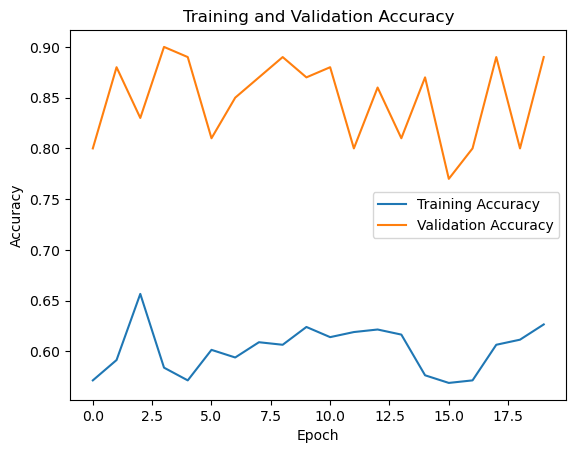

In [11]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# Set labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot

plt.show()

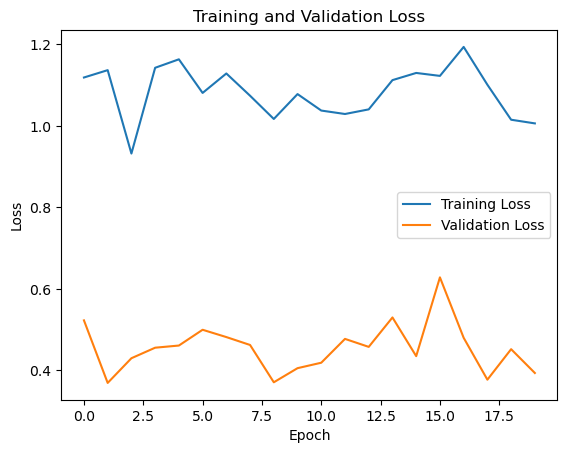

In [12]:
import matplotlib.pyplot as plt
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

# Set labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot

plt.show()